In [11]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Current directory:", current_directory)


Current directory: /home/sunzid/Research/23-24_Automatic-Control-Lab/LLMSim


In [2]:
# Import libraries

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


In [3]:
# Read data

# folder_path = 'Collection1/'
folder_path = 'Collection22/'
olfaction_1_csv = '*_1_olfaction.csv'
olfaction_csv = '*_olfaction.csv'

olfaction_files = glob.glob(folder_path + olfaction_csv)
olfaction_1_files = glob.glob(folder_path + olfaction_1_csv)

grid = pd.read_csv('grid.csv')

print(len(olfaction_1_files))

25


In [4]:
# Process data

x_list = []
y_list = []
x_list1 = []
y_list1 = []
direction_list = []
plume_list = []
glb_wind_blow_dir_list = []
wind_spd_list = []

for file in olfaction_files:
    df = pd.read_csv(file)
    x_list.append(float(file.split('/')[-1].split('_')[0]))
    y_list.append(float(file.split('/')[-1].split('_')[1]))
    direction_list.append(int(file.split('/')[-1].split('_')[2]))
    plume_list.append(round(df.plume.mean()))

olfaction_1 = pd.DataFrame({'x': x_list, 'y': y_list, 'direction': direction_list,
              'plume': plume_list})

for file in olfaction_1_files:
    df1 = pd.read_csv(file)
    x_list1.append(float(file.split('/')[-1].split('_')[0]))
    y_list1.append(float(file.split('/')[-1].split('_')[1]))
    glb_wind_blow_dir_list.append(round(df1.glbWindBlowDir.mean(), 2))
    wind_spd_list.append(round(df1.windSpd.mean(), 2))

olfaction_2 = pd.DataFrame({'x': x_list1, 'y': y_list1,
              'glb_wnd_blw_dir': glb_wind_blow_dir_list, 'wind_spd': wind_spd_list})

olfaction = olfaction_1.merge(olfaction_2, on=['x', 'y'], how='inner')

ordered_olfaction  = grid.merge(olfaction, on=['x', 'y'], how='inner')

ordered_olfaction_1dir = ordered_olfaction[ordered_olfaction['direction']==1]

ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)

/tmp/ipykernel_4588/3759403110.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)


In [5]:
print(len(ordered_olfaction_1dir))
ordered_olfaction_1dir

25


,x,y,direction,plume,glb_wnd_blw_dir,wind_spd
0,0.2,-0.2,1,772.0,192.52,0.30
6,0.1,0.4,1,778.0,151.07,1.71
11,0.0,1.0,1,784.0,178.13,1.02
13,-0.1,1.6,1,792.0,186.99,1.34
16,-0.2,2.2,1,797.0,147.86,0.22
23,0.8,-0.1,1,760.0,200.19,0.43
25,0.7,0.5,1,723.0,160.40,2.06
29,0.6,1.1,1,702.0,178.51,0.96
35,0.5,1.7,1,710.0,196.69,1.29
39,0.4,2.3,1,804.0,229.58,0.16


In [43]:
import numpy as np
import pandas as pd

# Example input data for meshgrid
x = np.arange(1, 6)  # X-axis points
y = np.arange(1, 6)  # Y-axis points
X, Y = np.meshgrid(x, y)

# Example input data arrays
plume = np.array(ordered_olfaction_1dir.plume).reshape((len(Y), len(X)))
wind_dir = np.array(ordered_olfaction_1dir.glb_wnd_blw_dir).reshape((len(Y), len(X)))
wind_spd = np.array(ordered_olfaction_1dir.wind_spd).reshape((len(Y), len(X)))

# Stack the data arrays into a single 3D array
combined_values = np.stack((plume, wind_dir, wind_spd), axis=-1)

# Function to convert array rows into tuples
def to_tuple(array):
    return [tuple(x) for x in array]

# Convert each row into tuples
tuples_data = [to_tuple(row) for row in combined_values]

# Create a DataFrame from the tuples data
df = pd.DataFrame(tuples_data, index=y, columns=x)

# Flip the columns (x-axis) and the rows (y-axis)
df = df.iloc[::-1].iloc[:, ::-1]

df.to_csv('3d_table.csv')


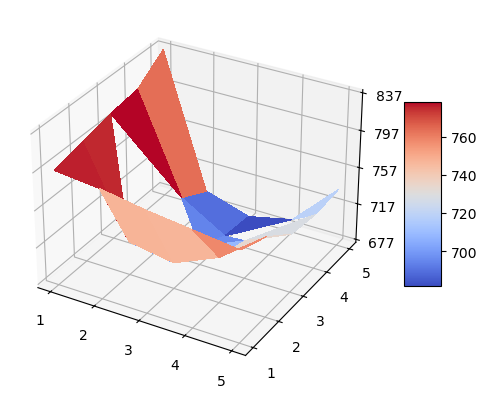

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

plume = np.array(ordered_olfaction_1dir.plume).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, plume, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

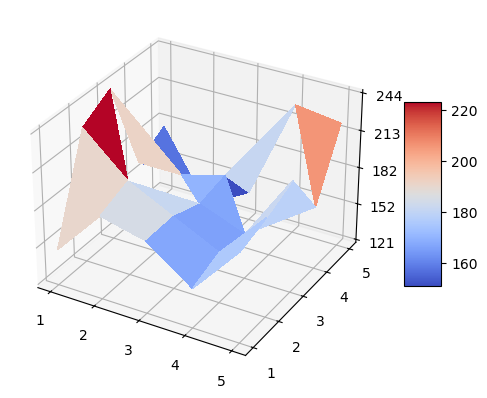

In [23]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

wind_dir = np.array(ordered_olfaction_1dir.glb_wnd_blw_dir).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, wind_dir, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

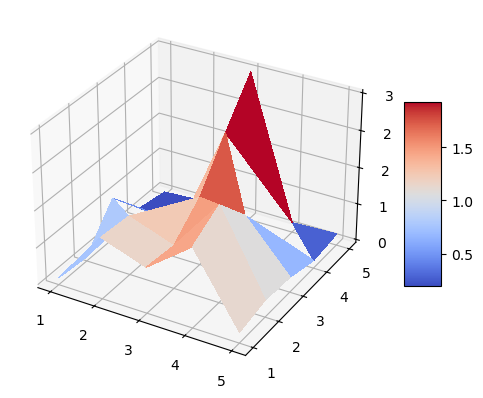

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

wind_spd = np.array(ordered_olfaction_1dir.wind_spd).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, wind_spd, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()